In [67]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from matplotlib.mlab import PCA as mlabPCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
%matplotlib inline

In [68]:
# create new list by skipping certain number of elements in old list
def create_sublist(lst_a, lst_b, num=10):
    lst_a_new = []
    lst_b_new = []
    count = 0
    for x in lst_a:
        if count%num == 0:
            lst_a_new.append(lst_a[count])
            lst_b_new.append(str(lst_b[count]))
        count += 1

    return lst_a_new, lst_b_new

In [69]:
# create list [n, n-1, ...nmin]
def create_list(n, ndays):
    lst = []
    nmin = (n - ndays + 1)
    if (n <= (ndays-1)):
        nmin = 0
    x = n
    while x >= nmin:
        lst.append(x)
        x -= 1
    
    return lst

In [70]:
# construct moving averaged value over a fixed window of the current to ndays previous
def moving_average(lst, ndays):
    lst_new = []
    for i in range(len(lst)):
        ma = 0.0
        ma_lst = create_list(i, ndays)
        for j in ma_lst:
            ma += lst[j]
        ma = ma / len(ma_lst)
        lst_new.append(ma)
                
    return lst_new

In [71]:
# Dataset   security daily prices - SP500, AAPL, MCD, TNX(10-year bond), EURUSD(Currency)
#        features    categorical    two variables
#        features    continuous     four variables
#        outcome      
df = pd.read_csv('../data-101/Security/Dataset.csv')

In [72]:
# feature variables,   four ratio variables: Date, Price, High, Low
df.head(3)

,Security,Symbol,Date,Price,High,Low
0,Equity,SP500,1/2/2018,2695.810059,2695.889893,2682.360107
1,Equity,SP500,1/3/2018,2713.060059,2714.370117,2697.770020
2,Equity,SP500,1/4/2018,2723.989990,2729.290039,2719.070068


In [73]:
# outcome variables:  component


In [74]:
# Calculate statistics of each variables
# First rescale Price individually according to Symbol
m_list = df.groupby('Symbol').mean()
std_list = df.groupby('Symbol').std()
std_list_re = std_list/m_list
m_list.head(3)

,Price,High,Low
Symbol,,,
AAPL,189.053427,190.994104,187.183506
EURUSD,1.181678,NaN,NaN
MCD,166.062350,167.424223,164.749881


In [75]:
print(std_list_re)

           Price      High       Low
Symbol                              
AAPL    0.108931  0.107778  0.109198
EURUSD  0.030979       NaN       NaN
MCD     0.054403  0.054459  0.054204
SP500   0.036563  0.033722  0.039075
TNX     0.054024  0.053040  0.054663


In [76]:
m_AAPL = m_list.Price[0]
m_EURUSD = m_list.Price[1]
m_MCD = m_list.Price[2]
m_SP500 = m_list.Price[3]
m_TNX = m_list.Price[4]

# Create new DataFrame features, with Price rescaled by mean of each security 
features = pd.DataFrame(columns=['Date', 'AAPL', 'MCD', 'SP500', 'TNX', 'EURUSD'])
features['Date'] = df.loc[df['Symbol']=='AAPL', 'Date'].tolist()
features['AAPL'] = df.loc[df['Symbol']=='AAPL', 'Price'].tolist()
features['EURUSD'] = df.loc[df['Symbol']=='EURUSD', 'Price'].tolist()
features['MCD'] = df.loc[df['Symbol']=='MCD', 'Price'].tolist()
features['SP500'] = df.loc[df['Symbol']=='SP500', 'Price'].tolist()
features['TNX'] = df.loc[df['Symbol']=='TNX', 'Price'].tolist()

features['AAPL_rescale'] = (features['AAPL']/m_AAPL).tolist()
features['MCD_rescale'] = (features['MCD']/m_MCD).tolist()
features['SP500_rescale'] = (features['SP500']/m_SP500).tolist()
features['TNX_rescale'] = (features['TNX']/m_TNX).tolist()
features['EURUSD_rescale'] = (features['EURUSD']/m_EURUSD).tolist()

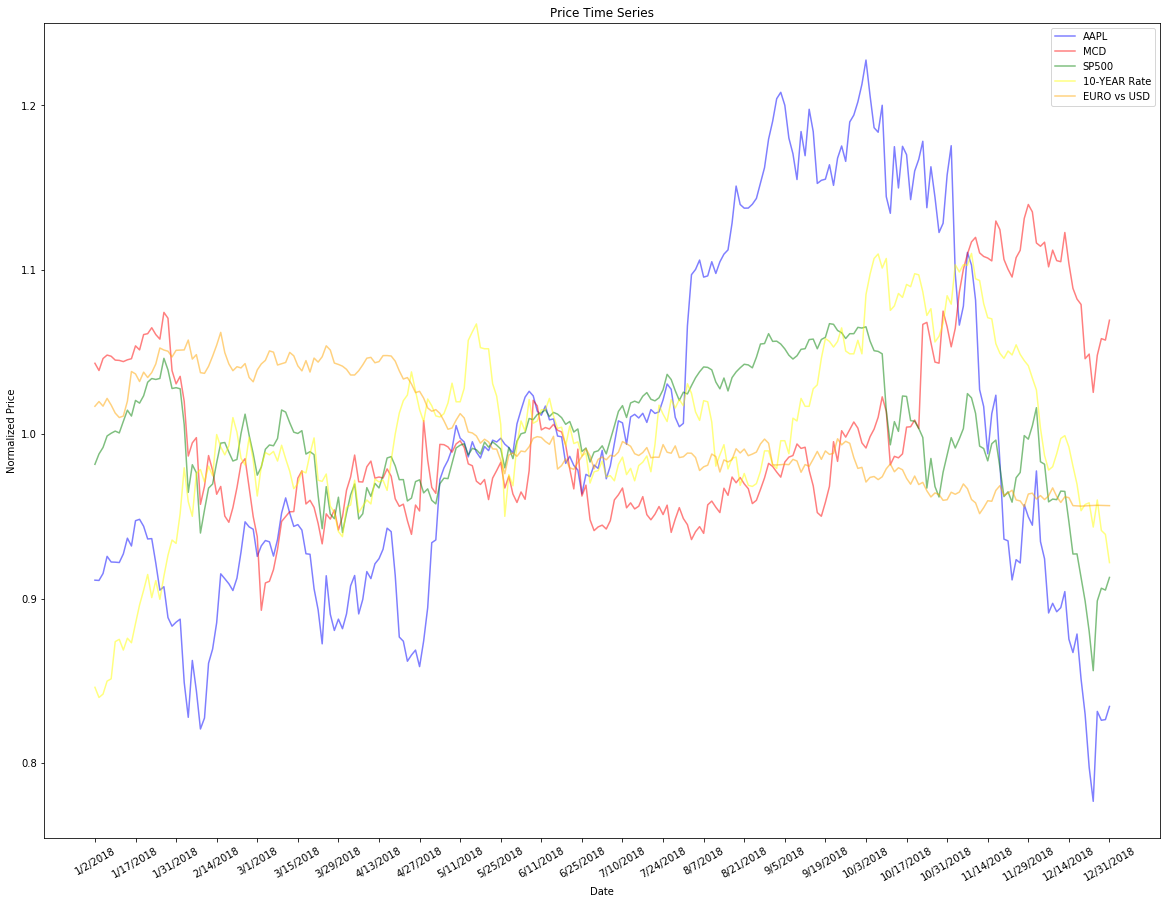

In [77]:
# plot price time series of multiple securities
plt.figure(figsize=(20,15))
plt.plot(features['Date'], features['AAPL_rescale'], color='blue', label='AAPL', alpha=0.5)
plt.legend(loc='upper right')
plt.plot(features['Date'], features['MCD_rescale'], color='red', label='MCD', alpha=0.5)
plt.legend(loc='upper right')
plt.plot(features['Date'], features['SP500_rescale'], color='green', label='SP500', alpha=0.5)
plt.legend(loc='upper right')
plt.plot(features['Date'], features['TNX_rescale'], color='yellow', label='10-YEAR Rate', alpha=0.5)
plt.legend(loc='upper right')
plt.plot(features['Date'], features['EURUSD_rescale'], color='orange', label='EURO vs USD', alpha=0.5)
plt.legend(loc='upper right')
locs, labels = plt.xticks()
labels = features['Date'].tolist()
locs_new, labels_new = create_sublist(locs, labels, 10)
plt.xticks(rotation=30)
plt.xticks(locs_new, labels_new)
plt.xlabel("Date")
plt.ylabel("Normalized Price")
plt.title("Price Time Series")
plt.show()

In [78]:
features.head(3)

,Date,AAPL,MCD,SP500,TNX,EURUSD,AAPL_rescale,MCD_rescale,SP500_rescale,TNX_rescale,EURUSD_rescale
0,1/2/2018,172.259995,173.220001,2695.810059,2.465,1.20172,0.911171,1.043102,0.981646,0.846008,1.016960
1,1/3/2018,172.229996,172.490005,2713.060059,2.447,1.20509,0.911012,1.038706,0.987927,0.839830,1.019812
2,1/4/2018,173.029999,173.699997,2723.989990,2.453,1.20178,0.915244,1.045993,0.991907,0.841889,1.017011


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


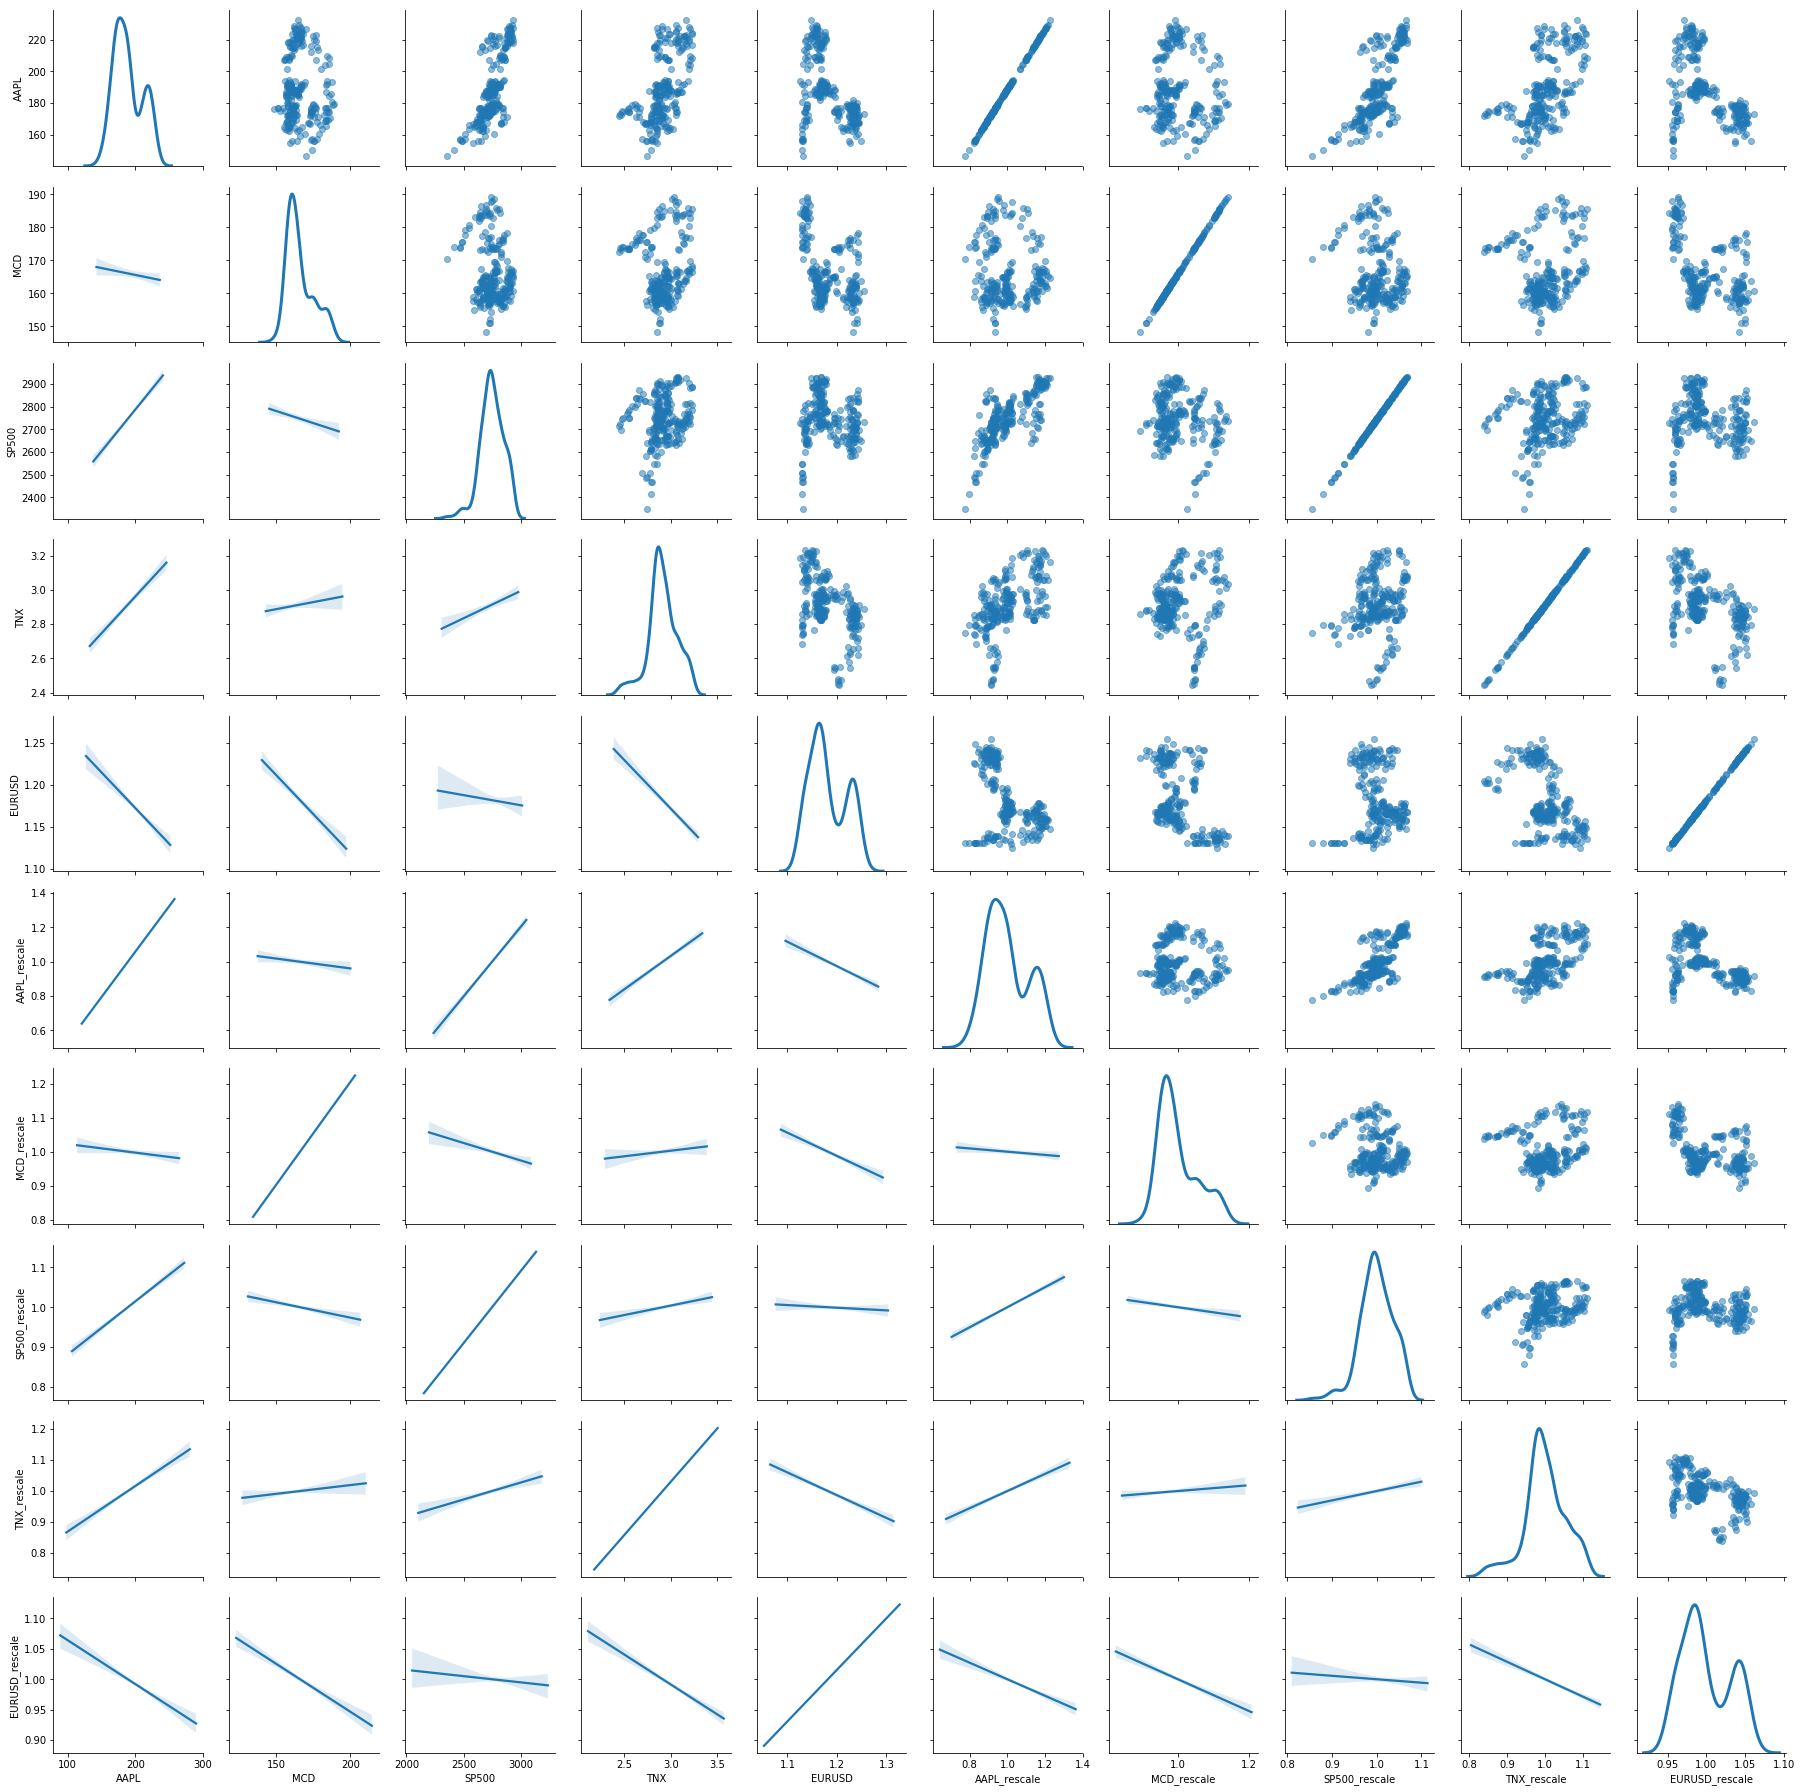

In [79]:
# analyze the data with univariate & bivariate methods
graph = sns.PairGrid(features, diag_sharey=False)
# scatter plots
graph.map_upper(plt.scatter, alpha=0.5)
# fit line showing linear relationship
graph.map_lower(sns.regplot, scatter_kws=dict(alpha=0))
# plot the univariate distribution of the variable
graph.map_diag(sns.kdeplot, lw=3)
plt.show()

In [80]:
fea_clean = features.drop(["AAPL", "MCD", "SP500", "TNX", "EURUSD"], axis=1)

In [81]:
corr_mat = fea_clean.corr()
print(corr_mat)

                AAPL_rescale  MCD_rescale  SP500_rescale  TNX_rescale  \
AAPL_rescale        1.000000    -0.095199       0.752418     0.560947   
MCD_rescale        -0.095199     1.000000      -0.190637     0.094516   
SP500_rescale       0.752418    -0.190637       1.000000     0.204682   
TNX_rescale         0.560947     0.094516       0.204682     1.000000   
EURUSD_rescale     -0.478512    -0.458396      -0.066714    -0.497765   

                EURUSD_rescale  
AAPL_rescale         -0.478512  
MCD_rescale          -0.458396  
SP500_rescale        -0.066714  
TNX_rescale          -0.497765  
EURUSD_rescale        1.000000  


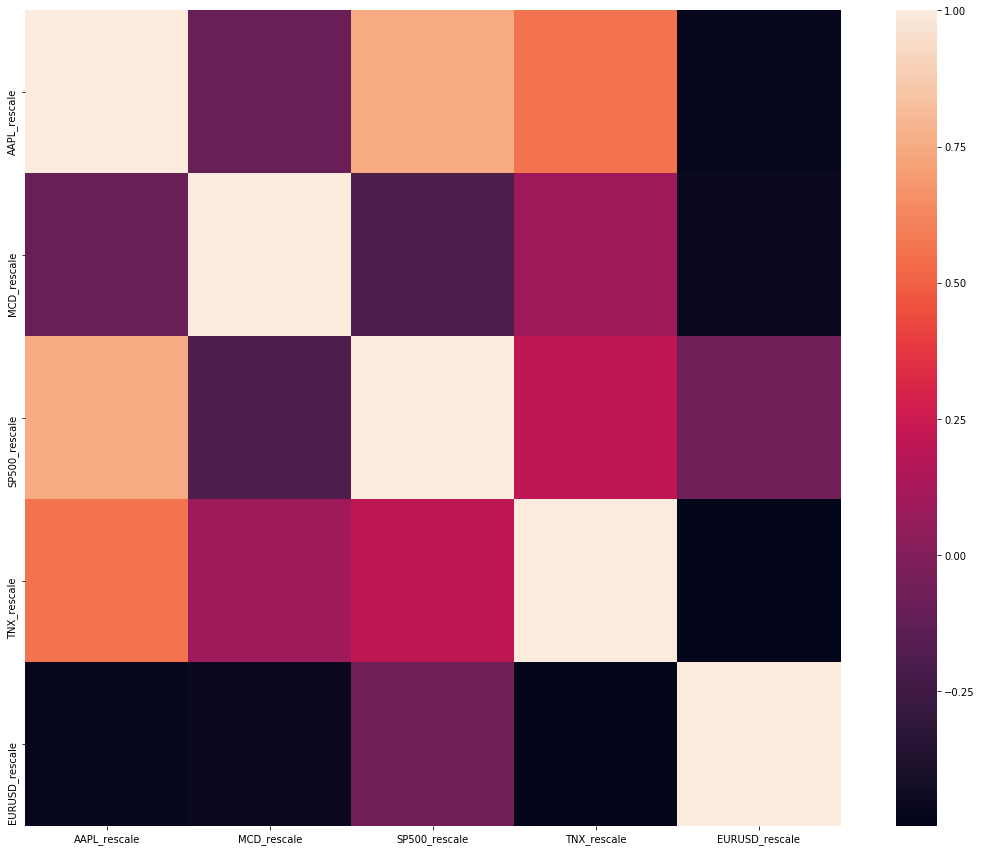

In [82]:
f, ax = plt.subplots(figsize=(20, 15))
sns.heatmap(corr_mat, square=True)
plt.show()

In [83]:
# create ten new features
#   1) normalized price       2) 5-day moving average        3) 20-day moving average
#   4) historical volatility    5) 
# 5-day moving average
features['AAPL_ma5'] = moving_average(features['AAPL'].tolist(), 5)
features['MCD_ma5'] = moving_average(features['MCD'].tolist(), 5)
features['SP500_ma5'] = moving_average(features['SP500'].tolist(), 5)
features['TNX_ma5'] = moving_average(features['TNX'].tolist(), 5)
features['EURUSD_ma5'] = moving_average(features['EURUSD'].tolist(), 5)
# 20-day moving average
features['AAPL_ma20'] = moving_average(features['AAPL'].tolist(), 20)
features['MCD_ma20'] = moving_average(features['MCD'].tolist(), 20)
features['SP500_ma20'] = moving_average(features['SP500'].tolist(), 20)
features['TNX_ma20'] = moving_average(features['TNX'].tolist(), 20)
features['EURUSD_ma20'] = moving_average(features['EURUSD'].tolist(), 20)

In [84]:
# Use filtering methods
# the variances are
print(std_list_re)

           Price      High       Low
Symbol                              
AAPL    0.108931  0.107778  0.109198
EURUSD  0.030979       NaN       NaN
MCD     0.054403  0.054459  0.054204
SP500   0.036563  0.033722  0.039075
TNX     0.054024  0.053040  0.054663


In [85]:
# the correlation coefficiencies
print(corr_mat)

                AAPL_rescale  MCD_rescale  SP500_rescale  TNX_rescale  \
AAPL_rescale        1.000000    -0.095199       0.752418     0.560947   
MCD_rescale        -0.095199     1.000000      -0.190637     0.094516   
SP500_rescale       0.752418    -0.190637       1.000000     0.204682   
TNX_rescale         0.560947     0.094516       0.204682     1.000000   
EURUSD_rescale     -0.478512    -0.458396      -0.066714    -0.497765   

                EURUSD_rescale  
AAPL_rescale         -0.478512  
MCD_rescale          -0.458396  
SP500_rescale        -0.066714  
TNX_rescale          -0.497765  
EURUSD_rescale        1.000000  


In [86]:
# performing PCA 
df_pca = features.loc[:, ['AAPL_rescale', 'MCD_rescale', 'SP500_rescale', 'TNX_rescale', 'EURUSD_rescale']]
# normalize
X = StandardScaler().fit_transform(df_pca)
Xt = X.T
# covariance matrix
Corr_x = np.cov(Xt)
print('Covariance matrix: \n', Corr_x)

Covariance matrix: 
 [[ 1.004      -0.09557997  0.75542809  0.5631904  -0.48042638]
 [-0.09557997  1.004      -0.19139951  0.09489432 -0.46022979]
 [ 0.75542809 -0.19139951  1.004       0.20550119 -0.0669813 ]
 [ 0.5631904   0.09489432  0.20550119  1.004      -0.49975578]
 [-0.48042638 -0.46022979 -0.0669813  -0.49975578  1.004     ]]


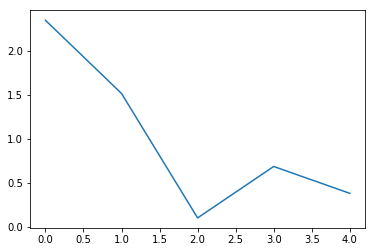

In [87]:
eig_val_cov, eig_vec_cov = np.linalg.eig(Corr_x)
plt.plot(eig_val_cov)
plt.show()

In [88]:
P = eig_vec_cov[:, 0]
# Transform to Y
Y = P.T.dot(Xt)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


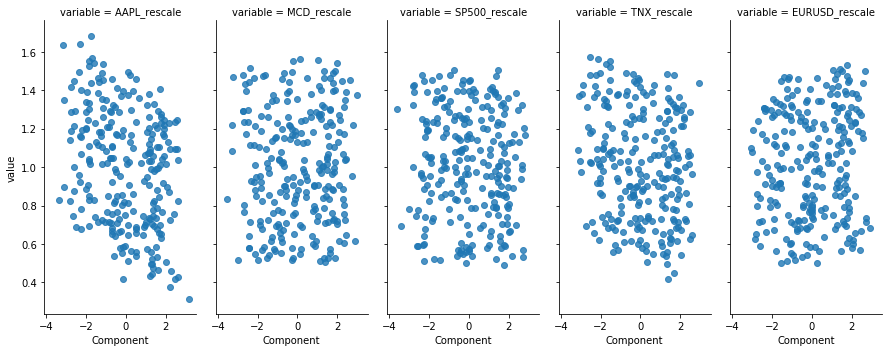

In [89]:
data_to_plot = df_pca[['AAPL_rescale', 'MCD_rescale', 'SP500_rescale', 'TNX_rescale', 'EURUSD_rescale']]
data_to_plot['Component'] =Y
data_to_plot = pd.melt(data_to_plot, id_vars='Component')
g = sns.FacetGrid(data_to_plot, col='variable', size=5, aspect=0.5)
g.map(sns.regplot, 'Component', 'value', x_jitter=.49, y_jitter=.49, fit_reg=False)
plt.show()
